In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib as mpl
import numpy as np
import scipy as sp
import json
import sys

In [3]:
df = pd.read_csv('./project_pipeline/data/classified_files_3.tsv', sep='\t').astype('object')
df_2 = pd.read_csv('./project_pipeline/data/proteins_interface.tsv', sep='\t').astype('object')
df_2 = df_2[['uniprot', 'pdb', 'number_interface_residues']]

In [4]:
# Merge the dataframes
df = df.merge(df_2, on=['uniprot', 'pdb'], how='left')
df['number_interface_residues'] = df['number_interface_residues'].astype('float')
df['number_interface_residues'] = df['number_interface_residues'].fillna(0)

c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

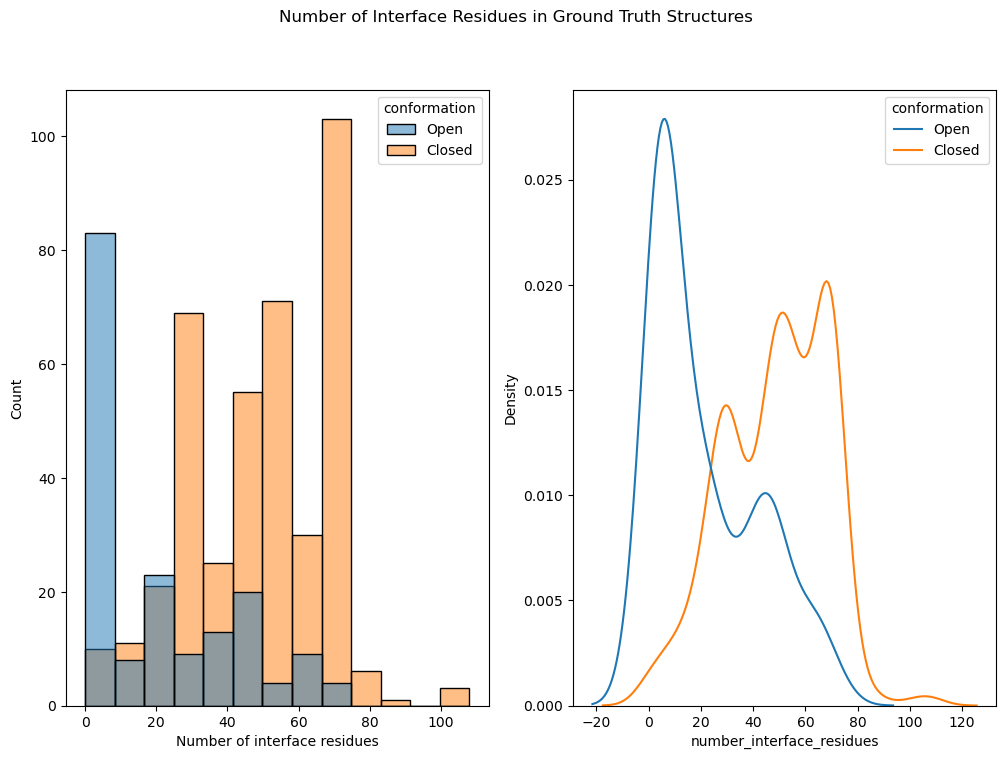

In [6]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.histplot(data=df, x='number_interface_residues', hue='conformation', ax=ax[0])
ax[0].set_xlabel('Number of interface residues')

sns.kdeplot(data=df, x='number_interface_residues', hue='conformation', ax=ax[1], common_norm=False)

plt.suptitle('Number of Interface Residues in Ground Truth Structures')
plt.savefig('./project_pipeline/data/figures/interface_residues.png')

plt.show()
# plt.savefig('./project_pipeline/data/figures/interface_residues.png', dpi=300, bbox_inches='tight')

c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

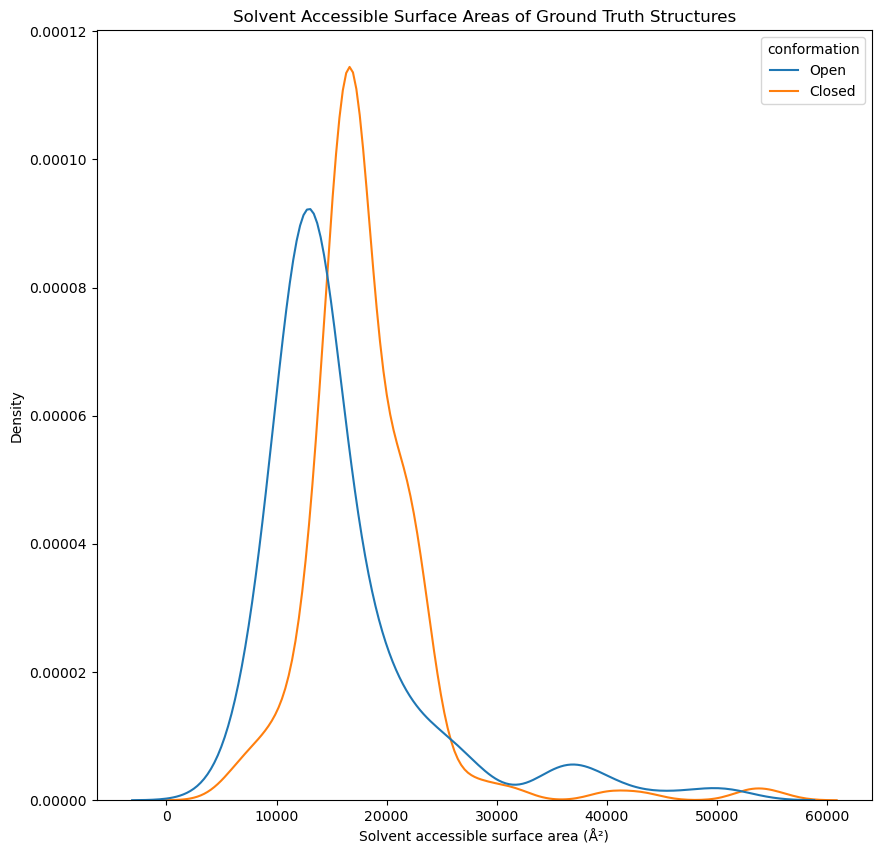

In [7]:
df_sasa = pd.read_csv('project_pipeline/data/solvent_accessibility.tsv', sep='\t').astype('object')

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
sns.kdeplot(data=df_sasa, x='sasa', hue='conformation', common_norm=False)
ax.set_xlabel('Solvent accessible surface area (Å²)')
ax.set_title('Solvent Accessible Surface Areas of Ground Truth Structures')
plt.savefig('./project_pipeline/data/figures/sasa.png')
plt.show()